# Vision Tarea 17
#### Daniel Castro Pineda 2220220H

### Para una imagen dada de tamaño 512x512 hacer la convolución con un kernel de caja de tamaño 51x51. Hacer la implementación haciendo:

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import scipy.fftpack as fft
import cv2
import urllib.request


## a) La convolución circular bidimensional

In [205]:
def completeConvolution(img, kernel):
    kernel = np.flip(kernel)
    nrows, ncols = img.shape
    krows, kcols = kernel.shape
    pad_size = (krows - 1) // 2
    padded_img = np.pad(img, pad_size, mode='wrap')
    output = np.array([[
        np.sum(padded_img[i:i+krows, j:j+kcols] * kernel) 
        for j in range(ncols)]
        for i in range(nrows)])
    return output

In [206]:
x = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25]])
h = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

complete = completeConvolution(x, h)
print("Convolucion completa: ")
print(complete)

scipyConvolution = convolve2d(x, h, mode='same', boundary='wrap')
print("Convolucion de scipy: ")
print(scipyConvolution)


print("¿Son iguales?")
print(np.allclose(complete, scipyConvolution))


Convolucion completa: 
[[ 99  93 102 111 105]
 [ 69  63  72  81  75]
 [114 108 117 126 120]
 [159 153 162 171 165]
 [129 123 132 141 135]]
Convolucion de scipy: 
[[ 99  93 102 111 105]
 [ 69  63  72  81  75]
 [114 108 117 126 120]
 [159 153 162 171 165]
 [129 123 132 141 135]]
¿Son iguales?
True


## b) La convolución circular desacoplada

In [207]:
def convolveDesacopladaDot(img, kernelx, kernely):
    kernelx = np.flip(kernelx)
    kernely = np.flip(kernely)

    nrows, ncols = img.shape
    output = np.zeros((nrows, ncols))

    for i in range(nrows):
      output[i, :] = convolveDot(img[i, :], kernelx)
    # print(output)
    output2 = np.zeros((nrows, ncols))

    for j in range(ncols):
      output2[:, j] = convolveDot(output[:, j], kernely)
    # print(output2)
    return output2


def convolveDot(signal, kernel):
    ker_size = kernel.size
    sig_size = signal.size
    # kernel = kernel[::-1]
    pad_size = (ker_size - 1) // 2
    padded_signal = np.pad(signal, pad_size, mode='wrap')
    output = np.zeros(sig_size)
    output = [np.dot(padded_signal[k:k+ker_size], kernel)
              for k in range(sig_size)]
    return output


In [208]:
x = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25]])
h1 = np.array([
    1, 1, 1
])
h2 = np.array([1,1,1])

desacoplada = convolveDesacopladaDot(x, h1, h2)
print("Convolucion desacoplada: ")
print(desacoplada)

scipyConvolution = convolve2d(x, h, mode='same', boundary='wrap')
print("Convolucion de scipy: ")
print(scipyConvolution)


print("¿Son iguales?")
print(np.allclose(desacoplada, scipyConvolution))


Convolucion desacoplada: 
[[ 99.  93. 102. 111. 105.]
 [ 69.  63.  72.  81.  75.]
 [114. 108. 117. 126. 120.]
 [159. 153. 162. 171. 165.]
 [129. 123. 132. 141. 135.]]
Convolucion de scipy: 
[[ 99  93 102 111 105]
 [ 69  63  72  81  75]
 [114 108 117 126 120]
 [159 153 162 171 165]
 [129 123 132 141 135]]
¿Son iguales?
True


## C)La convolución utilizando imágenes integrales

In [209]:
def integralImg(img):
    nr = img.shape[0]
    nc = img.shape[1]
    intImg = np.zeros((nr, nc))
    intImg = np.cumsum(np.cumsum(img, axis=0), axis=1)
    return intImg

def SuavizadoIntegral(imgIntegral, boxSize):
    N = 2*boxSize+1
    nrows, ncols = imgIntegral.shape
    pad = (N - 1) // 2
    integralSuavizada = np.zeros((nrows, ncols))

    for r in range(nrows):
        for c in range(ncols):
            r0 = r - pad
            c0 = c - pad
            r1 = r + pad
            c1 = c + pad

            if r1 >= nrows:
                r1 = nrows - 1
            if c1 >= ncols:
                c1 = ncols - 1

            s0 = imgIntegral[r1, c1]
            s1 = 0
            s2 = 0
            s3 = 0

            if r0 > 0:
                s1 = imgIntegral[r0-1, c1]
            if c0 > 0:
                s2 = imgIntegral[r1, c0-1]
            if r0 > 0 and c0 > 0:
                s3 = imgIntegral[r0-1, c0-1]
            integralSuavizada[r, c] = s0 - s1 - s2 + s3
    return integralSuavizada/(N*N)


In [210]:
x = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25]])
h = np.ones((3, 3))*1/9

intImg = integralImg(x)

integralSuave = SuavizadoIntegral(intImg, 1)
print("Integral suavizada: ")
print(integralSuave)

scipyConvolution = convolve2d(x, h, mode='same')
print("Convolucion de scipy: ")
print(scipyConvolution)

print("¿Son iguales?")
print(np.allclose(integralSuave, scipyConvolution))


Integral suavizada: 
[[ 1.77777778  3.          3.66666667  4.33333333  3.11111111]
 [ 4.33333333  7.          8.          9.          6.33333333]
 [ 7.66666667 12.         13.         14.          9.66666667]
 [11.         17.         18.         19.         13.        ]
 [ 8.44444444 13.         13.66666667 14.33333333  9.77777778]]
Convolucion de scipy: 
[[ 1.77777778  3.          3.66666667  4.33333333  3.11111111]
 [ 4.33333333  7.          8.          9.          6.33333333]
 [ 7.66666667 12.         13.         14.          9.66666667]
 [11.         17.         18.         19.         13.        ]
 [ 8.44444444 13.         13.66666667 14.33333333  9.77777778]]
¿Son iguales?
True


# d) Utilizando el teorema de la convolución.

In [211]:
# y = np.ones((7,7))

# x = np.array([[1, 2, 3, 4, 5],
#               [6, 7, 8, 9, 10],
#               [11, 12, 13, 14, 15],
#               [16, 17, 18, 19, 20],
#               [21, 22, 23, 24, 25]])

def convFFT(img, kernel):
    nr = img.shape[0]
    nc = img.shape[1]
    aux = np.zeros((nr,nc))
    aux[0,0] = 1
    # convolucionar circularmente con aux para dejar la imagen del mismo tamaño
    
    # y = completeConvolution(aux, kernel)
    y = convolve2d(aux, kernel, mode='same', boundary='wrap')
    # hacemos la fft de la imagen y de la mascara
    YFFT = fft.fft2(y)
    XFFT = fft.fft2(img)
    # hacemos el producto en el dominio de la frecuencia
    IFFT = fft.ifft2(YFFT*XFFT)
    return IFFT




In [212]:
x = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25]])
y = np.ones((3, 3))

imgFFT = convFFT(x, y)

print(imgFFT.real)
print('Utilizando la convolucion de scipy: ')
scipyConvolution = convolve2d(x, y, mode='same', boundary='wrap')
print(scipyConvolution)

print("¿Son iguales?")
print(np.allclose(imgFFT.real, scipyConvolution))



[[ 99.  93. 102. 111. 105.]
 [ 69.  63.  72.  81.  75.]
 [114. 108. 117. 126. 120.]
 [159. 153. 162. 171. 165.]
 [129. 123. 132. 141. 135.]]
Utilizando la convolucion de scipy: 
[[ 99.  93. 102. 111. 105.]
 [ 69.  63.  72.  81.  75.]
 [114. 108. 117. 126. 120.]
 [159. 153. 162. 171. 165.]
 [129. 123. 132. 141. 135.]]
¿Son iguales?
True


In [213]:
kernel = np.ones((51, 51))
N = 512
img = np.zeros((N, N))

img = np.array([[j if 0<=j<=9  and 0<=i<=9 else 0 for j in range(N)] for i in range(N)])


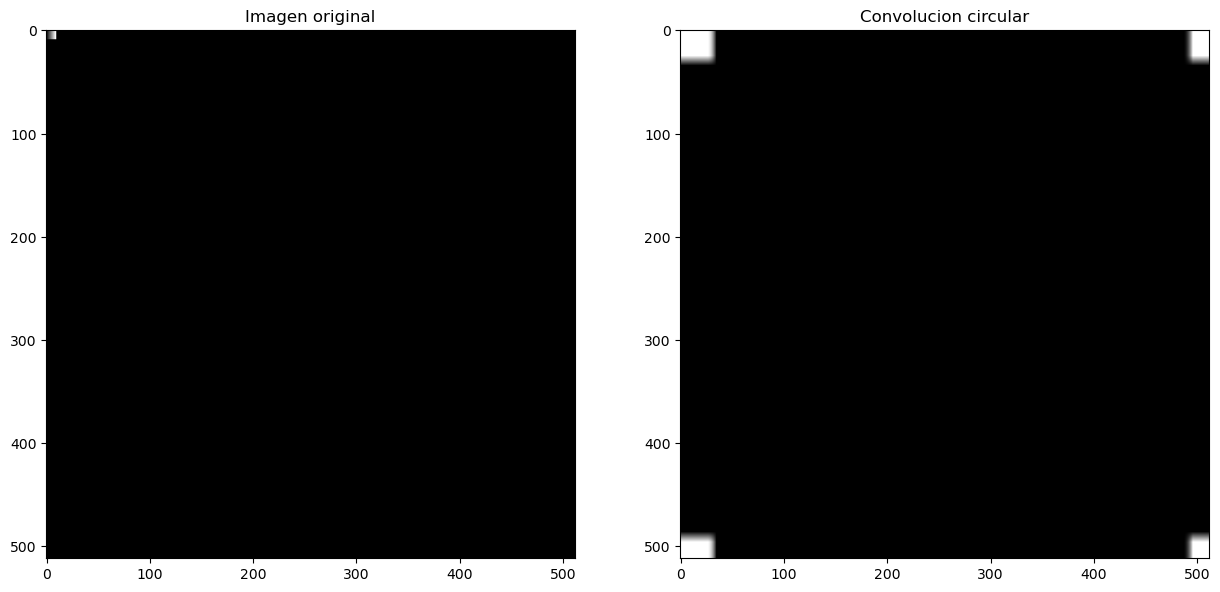

[[450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]]


In [214]:
cC = completeConvolution(img,kernel)
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Imagen original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Convolucion circular')
plt.imshow(cC, cmap='gray')
plt.show()

print(cC[0:9 ,0:9])

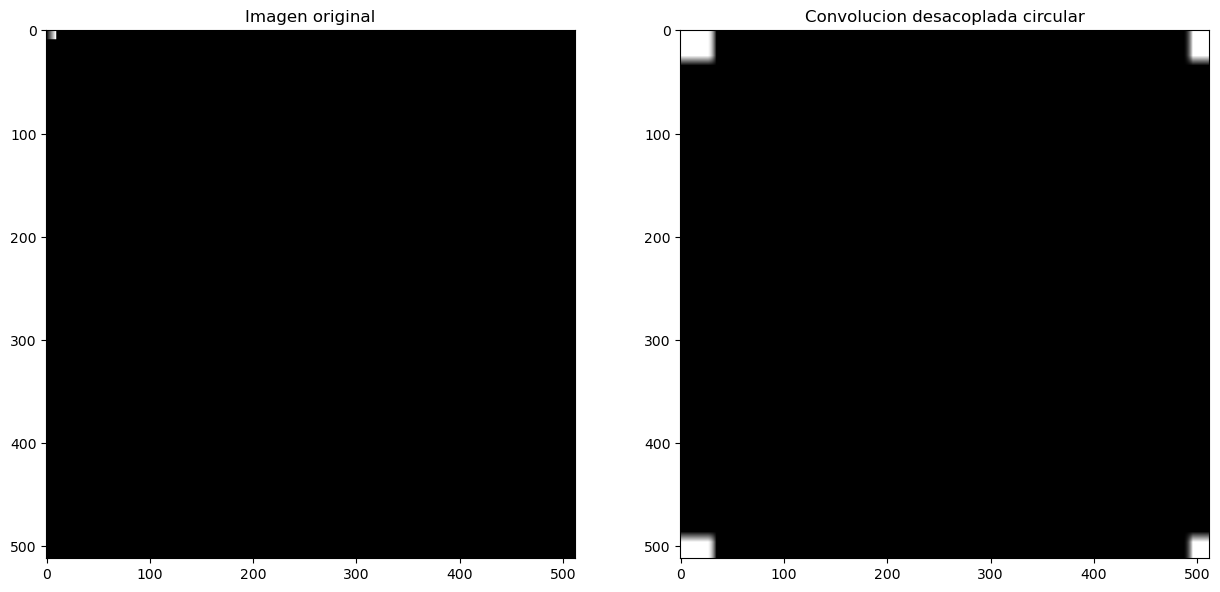

[[450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]]


In [215]:
h1 = np.ones((51))
cD = convolveDesacopladaDot(img, h1, h1)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Imagen original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Convolucion desacoplada circular')
plt.imshow(cD, cmap='gray')
plt.show()
print(cD[0:9 ,0:9])

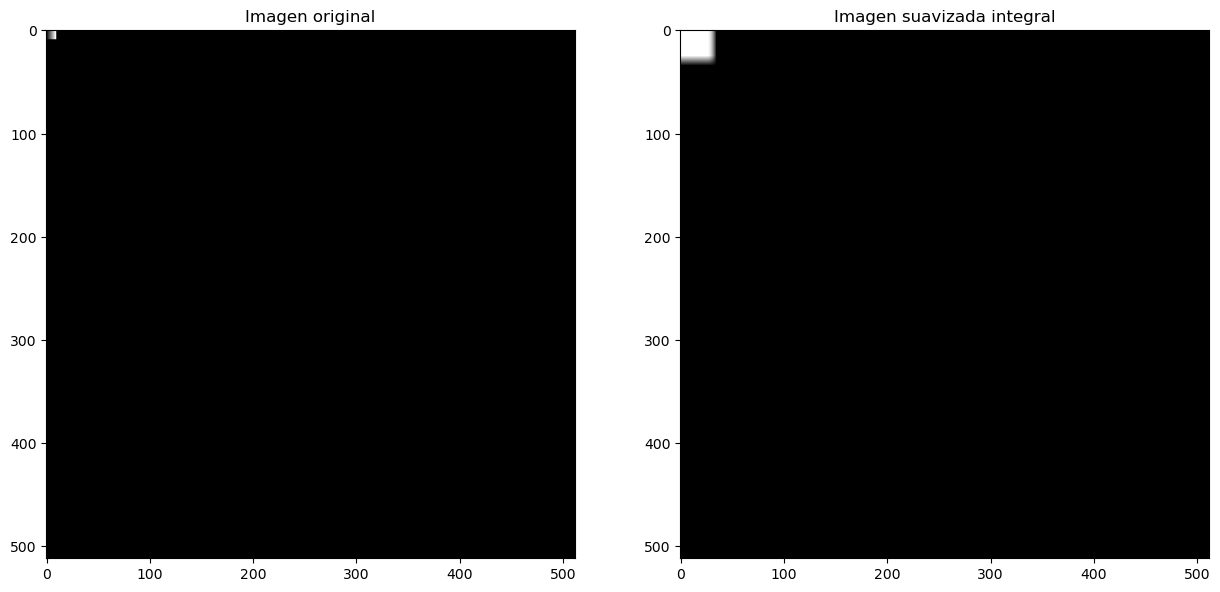

[[450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]]


In [216]:
intImg = integralImg(img)
intSuave = SuavizadoIntegral(intImg, 25)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Imagen original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen suavizada integral')
plt.imshow(intSuave, cmap='gray')
plt.show()

print(intSuave[0:9 ,0:9]*51*51)

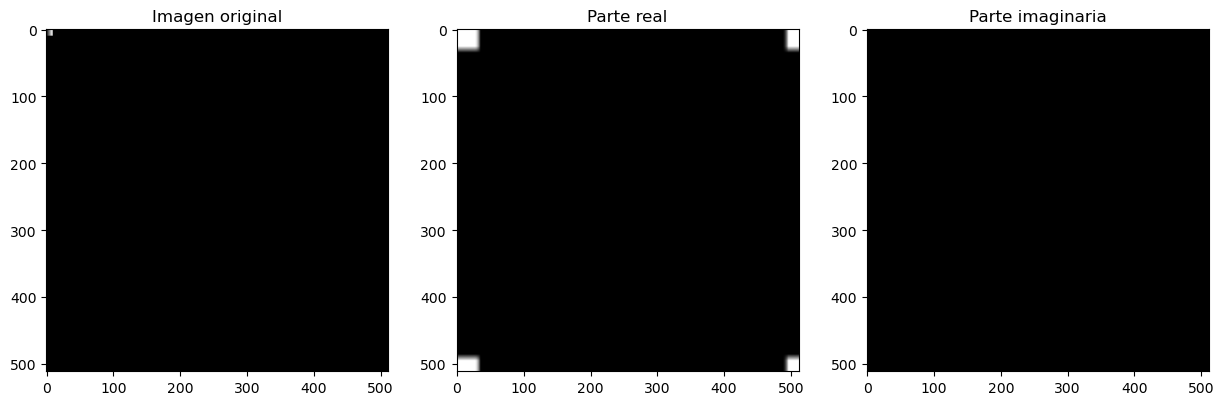

Parte real
[[450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450.]]
Parte imaginaria
[[ 0.00000000e+00  1.58761893e-14 -6.18949336e-15 -3.21964677e-15
  -5.55111512e-15 -1.80966353e-14 -1.08246745e-15 -4.71844785e-16
  -6.21724894e-15]
 [ 9.71935748e-15  1.85011240e-14  3.51598633e-15 -8.14422856e-15
   4.08497563e-15 -9.42098504e-15  4.57069820e-15 -6.77978724e-16
   1.18570735e-14]
 [-1.88800256e-15  1.75699028e-14 -6.27338351e-15 -4.15710218e-16
  -5.60724969e-15 -1.41824757e-14 -5.27418278e-15  3.60884825e-15
  -4.55253782e-15]
 [-3.36238199e-16  1.82038900e-14 -2.52892867e-15 -1.13280425e-14
  -7.99677707e-15 -1

In [217]:
imgFFT = convFFT(img, kernel)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title('Imagen original')
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Parte real')
plt.imshow(imgFFT.real, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Parte imaginaria')
plt.imshow(imgFFT.imag, cmap='gray', vmin=0, vmax=255)
plt.show()

print('Parte real')
print(imgFFT.real[0:9 ,0:9])
print('Parte imaginaria')
print(imgFFT.imag[0:9 ,0:9])

## Tiempos de Ejecución

Para el siguiente ejercicio se corre el código de los diferentes tipos de convolución 10 veces y posteriormente se promedian los tiempos de las ejecuciones. 
+ Tiempo promedio convolución completa circular:  1.751493s
+ Tiempo promedio convolución desacoplada circular:  0.651809s
+ Tiempo promedio convolución integral:  0.236725s
+ Tiempo promedio convolución FFT:  1.024284s

In [218]:
from time import perf_counter

promedioCompleta =0
promedioDesacoplada = 0
promedioIntegral = 0
promedioFFT = 0

for i in range(10):
    start = perf_counter()
    completeConvolution(img, kernel)
    end = perf_counter()
    promedioCompleta += end-start

    start = perf_counter()
    convolveDesacopladaDot(img, h1, h1)
    end = perf_counter()
    promedioDesacoplada += end-start

    start = perf_counter()
    intImg = integralImg(img)
    SuavizadoIntegral(intImg, 25)
    end = perf_counter()
    promedioIntegral += end-start

    start = perf_counter()
    convFFT(img, kernel)
    end = perf_counter()
    promedioFFT += end-start

print('Tiempo promedio convolución completa circular: ', promedioCompleta/10)
print('Tiempo promedio convolución desacoplada circular: ', promedioDesacoplada/10)
print('Tiempo promedio convolución integral: ', promedioIntegral/10)
print('Tiempo promedio convolución FFT: ', promedioFFT/10)


Tiempo promedio convolución completa circular:  1.7744014414998674
Tiempo promedio convolución desacoplada circular:  0.6603525333999641
Tiempo promedio convolución integral:  0.24495114159981313
Tiempo promedio convolución FFT:  1.0339338416002648


## Utilizando una imagen de 512x512 y un kernel de 51x51 se obtienen los siguientes resultados:

In [219]:
req = urllib.request.urlopen(
    'https://www.bioparcvalencia.es/wp-content/uploads/2017/06/ficha-animal-bioparc-valencia-chimpance.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
cC = completeConvolution(img,kernel)
cD = convolveDesacopladaDot(img, h1, h1)
intImg = integralImg(img)
intSuave = SuavizadoIntegral(intImg, 25)
imgFFT = convFFT(img, kernel)

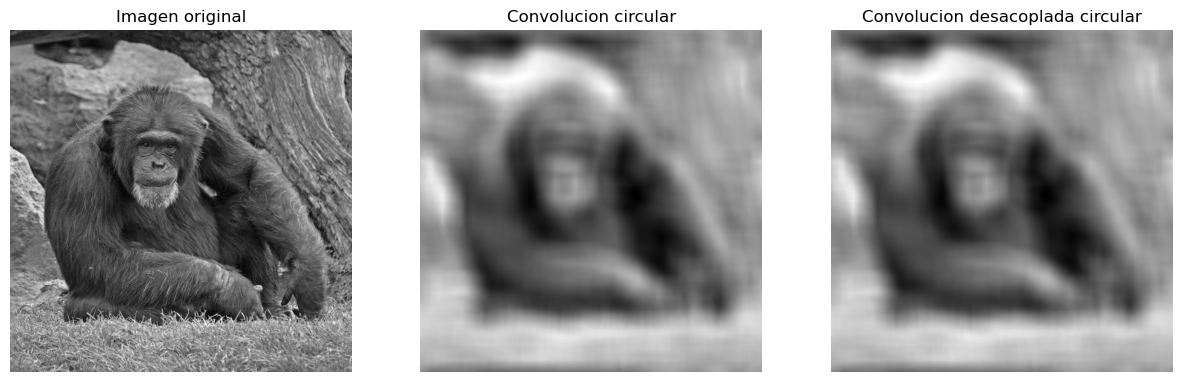

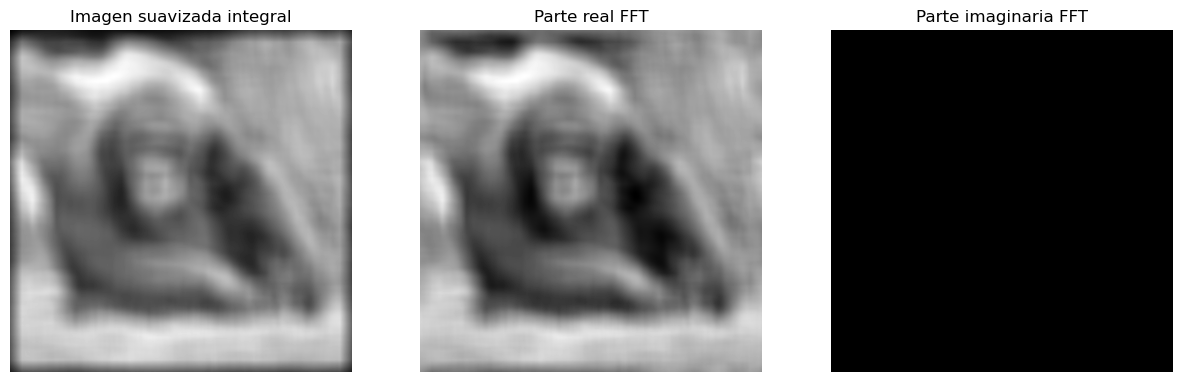

In [228]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 3, 1)
plt.title('Imagen original')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.title('Convolución circular')
plt.imshow(cC, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.title('Convolución desacoplada circular')
plt.imshow(cD, cmap='gray')
plt.axis('off')
plt.show()


plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.title('Imagen suavizada integral')
plt.imshow(intSuave, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Parte real FFT')
plt.imshow(imgFFT.real, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Parte imaginaria FFT')
plt.imshow(imgFFT.imag, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


In [232]:
print('Convolución Circular')
print(cC[0:9 ,0:9])
print('Convolución Desacoplada')
print(cD[0:9 ,0:9])


Convolución Circular
[[300126. 297970. 296151. 294345. 292441. 290525. 288864. 287483. 285799.]
 [298573. 296358. 294460. 292568. 290573. 288552. 286788. 285323. 283573.]
 [297239. 294994. 293038. 291039. 288914. 286758. 284839. 283236. 281373.]
 [295924. 293655. 291651. 289561. 287323. 285052. 283003. 281273. 279303.]
 [294630. 292339. 290280. 288107. 285775. 283422. 281293. 279477. 277420.]
 [293549. 291228. 289091. 286831. 284420. 282003. 279813. 277926. 275786.]
 [292644. 290297. 288092. 285770. 283311. 280850. 278604. 276642. 274419.]
 [291773. 289441. 287227. 284910. 282456. 279986. 277722. 275726. 273453.]
 [291081. 288799. 286616. 284353. 281948. 279507. 277261. 275261. 272959.]]
Convolución Desacoplada
[[300126. 297970. 296151. 294345. 292441. 290525. 288864. 287483. 285799.]
 [298573. 296358. 294460. 292568. 290573. 288552. 286788. 285323. 283573.]
 [297239. 294994. 293038. 291039. 288914. 286758. 284839. 283236. 281373.]
 [295924. 293655. 291651. 289561. 287323. 285052. 2830

In [233]:
print('Parte real')
print(imgFFT.real[0:9 ,0:9])
print('Parte imaginaria')
print(imgFFT.imag[0:9 ,0:9])

Parte real
[[300126. 297970. 296151. 294345. 292441. 290525. 288864. 287483. 285799.]
 [298573. 296358. 294460. 292568. 290573. 288552. 286788. 285323. 283573.]
 [297239. 294994. 293038. 291039. 288914. 286758. 284839. 283236. 281373.]
 [295924. 293655. 291651. 289561. 287323. 285052. 283003. 281273. 279303.]
 [294630. 292339. 290280. 288107. 285775. 283422. 281293. 279477. 277420.]
 [293549. 291228. 289091. 286831. 284420. 282003. 279813. 277926. 275786.]
 [292644. 290297. 288092. 285770. 283311. 280850. 278604. 276642. 274419.]
 [291773. 289441. 287227. 284910. 282456. 279986. 277722. 275726. 273453.]
 [291081. 288799. 286616. 284353. 281948. 279507. 277261. 275261. 272959.]]
Parte imaginaria
[[ 5.86838646e-12  7.57388582e-12  6.49115192e-12  1.17821862e-11
   1.02453297e-11  1.03050345e-11  8.68213570e-12  4.09056108e-12
   8.24515192e-12]
 [ 3.37345901e-12 -2.92906524e-12  3.65842497e-12  2.68705237e-12
   6.37869481e-13  4.21455379e-12  1.80893273e-12 -9.09512973e-13
   3.16562526